In [1]:
#Choose dataset and normalize features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

df = pd.read_csv('Iris.csv')
df.drop(columns=['Id'], inplace=True)  # Drop ID column if present
print(df.head())
X = df.drop('Species', axis=1)
y = df['Species']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


K=1, Accuracy=0.97
K=2, Accuracy=1.00
K=3, Accuracy=1.00
K=4, Accuracy=1.00
K=5, Accuracy=1.00
K=6, Accuracy=1.00
K=7, Accuracy=1.00
K=8, Accuracy=1.00
K=9, Accuracy=1.00
K=10, Accuracy=1.00


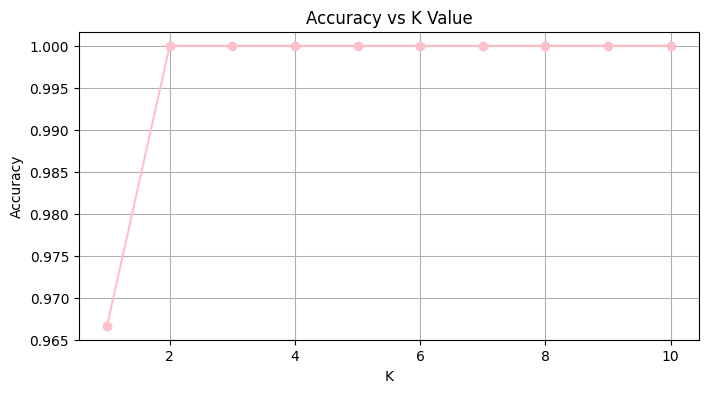

Best K: 2


In [3]:
#Use KNN Classifier from sklearn and experiment with different values for K
k_values = range(1, 11)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f'K={k}, Accuracy={acc:.2f}')

# Plot Accuracy vs K
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o', color='pink')
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(accuracies)]
print(f"Best K: {best_k}")
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred = final_knn.predict(X_test)

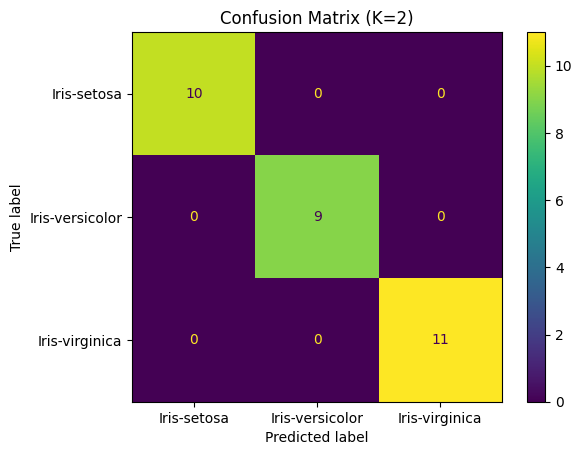

In [4]:
# Evaluate using confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=final_knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_knn.classes_)
disp.plot()
plt.title(f'Confusion Matrix (K={best_k})')
plt.show()

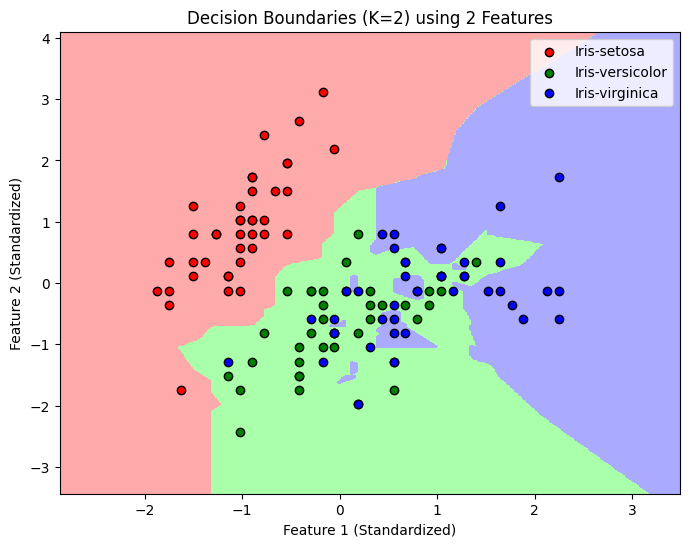

In [6]:
# Step 8: Visualize Decision Boundaries (only for 2 features)
# Use only first 2 features for visualization
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y, test_size=0.2, random_state=42)
knn_vis = KNeighborsClassifier(n_neighbors=best_k)
knn_vis.fit(X_train_vis, y_train_vis)

# Meshgrid creation
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

from sklearn.preprocessing import LabelEncoder

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
le = LabelEncoder()
le.fit(knn_vis.classes_)
Z_num = le.transform(Z)
Z_num = Z_num.reshape(xx.shape)

plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']

plt.contourf(xx, yy, Z_num, cmap=cmap_light)
for i, label in enumerate(knn_vis.classes_):
    idx = np.where(y_train_vis == label)
    plt.scatter(X_train_vis[idx, 0], X_train_vis[idx, 1], c=cmap_bold[i], label=label, edgecolor='k')

plt.title(f"Decision Boundaries (K={best_k}) using 2 Features")
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()